# <span style="color:blue">**INTRODUCTION**</span>
Food remains a crucial issue today. To be healthy, we need to eat well. However, among the French, several socio-economic factors can influence food consumption habits. With this in mind, we turned to survey data collected on the "data.gouv" website. They come from the Third National Individual Survey of French Food Consumption (INCA3). This study provides an overview of the food consumption habits of the population aged 0 to 79 in mainland France. It contains 11 data tables, accompanied by the documents required for their proper use. My study is based on two main tables: the Individual Description table (Description_indiv) and the Individual Daily Food Consumption table (CONSO_GPE_INCA3) for population 3. Most of the variables contained in these tables have been coded. The main variables we used and which are coded are:
 
 + **level of Education**
 
  1:Primaire+collège
  
  2:Lycée 
  
  3:Bac +1/3 
  
  4:Bac +4 et plus 
 
 + **Income**
  
  1:<380 €/mois 
  
  2:[380-530[ €/mois 
  
  3: [530-690[ €/mois 
  
 4: [690-840[ €/mois 
 
 5: [840-990[ €/mois 
 
 6: [990-1 300[ €/mois 
 
 7: [1 300-1 600[ €/mois
 
 8: [1 600-1 900[ €/mois
 
 9: [1 900-2 200[ €/mois 
 
 10: [2 200-2 500[ €/mois 
 
 11: [2 500-3 100[ €/mois 
 
 12: [3 100-4 600[ €/mois 
 
 13: >=4 600 €/mois 
 
 14: Ne sait pas 
 
 15: Refus 

 
These data have enabled us to identify two socio-economic factors that allow us to measure this inequality. These are level of education and income.
Link to the data used: "https://www.data.gouv.fr/fr/datasets/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/"

### <span style="color:blue">**Is food a major marker of inequality in France?**</span>

### <span style="color:blue">**Hypothesis**</span>

To answer this question, we formulate two hypotheses:

+ **Individuals' level of education influences their food consumption habits**
+ **The individual's income determines his or her level of food consumption**






In [1]:
import pandas as pd 
import numpy as np 

## Table Description_indiv

In [2]:
df= pd.read_csv("donnees/description-indiv.csv", sep=';', dtype={88:str})
df

,NOMEN,NOIND,ech,enf_allaite,pop1,pop2,pop3,pond_indiv_adu_pop1,pond_indiv_enf_pop1,pond_indiv_adu_pop2,...,fume_age_debut_nsp,fume_age_arret,fume_age_arret_nsp,bmr_kcal,sousest0,surest0,sousest1,sousest3,sousext,surext
0,1101001,110100101,1,NaN,1,1,1,11415.498010,NaN,18553.734263,...,NaN,NaN,NaN,1378.0930,0.0,0.0,0.0,NaN,0.0,0.0
1,1101007,110100701,1,NaN,1,1,1,4644.245013,NaN,4656.461407,...,NaN,NaN,NaN,1352.7802,1.0,0.0,1.0,NaN,0.0,0.0
2,1101008,110100801,1,NaN,1,1,1,6016.879562,NaN,6307.757457,...,NaN,33.0,NaN,1630.9735,0.0,0.0,0.0,NaN,0.0,0.0
3,1101012,110101201,1,NaN,1,1,1,1782.445803,NaN,2041.062541,...,NaN,NaN,NaN,1749.4603,0.0,0.0,0.0,NaN,0.0,0.0
4,1101014,110101401,1,NaN,1,1,1,2359.105604,NaN,2455.423813,...,NaN,NaN,NaN,1090.1117,0.0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5850,8275100,827510001,2,NaN,1,1,1,NaN,1932.267380,NaN,...,NaN,NaN,NaN,1309.2457,0.0,0.0,NaN,0.0,0.0,0.0
5851,8278046,827804601,2,NaN,1,0,0,NaN,709.842835,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5852,8284026,828402601,2,NaN,1,1,1,NaN,6094.492231,NaN,...,NaN,NaN,NaN,1533.3022,0.0,0.0,NaN,0.0,0.0,0.0
5853,8284027,828402701,2,NaN,1,1,1,NaN,2374.659257,NaN,...,NaN,NaN,NaN,1369.3202,0.0,0.0,NaN,0.0,0.0,0.0


In [3]:
#variables of interest in this Database
Description_ind= df[['NOMEN','NOIND','sex_PS','tage_PS','diplome_interv','etude_4cl_interv','situ_prof_5cl_interv','sex_PR','diplome_PR','etude_4cl_PR','revenu','situ_alim_statut','nbpers','nbadu','nbenf','IA_statut','taille','poids','imc']]
Description_ind

,NOMEN,NOIND,sex_PS,tage_PS,diplome_interv,etude_4cl_interv,situ_prof_5cl_interv,sex_PR,diplome_PR,etude_4cl_PR,revenu,situ_alim_statut,nbpers,nbadu,nbenf,IA_statut,taille,poids,imc
0,1101001,110100101,1,7,7.0,1,3,1,7.0,1,12,1,4,3,1,0,168.0,51.599998,18.282312
1,1101007,110100701,2,8,7.0,1,1,1,7.0,1,11,1,2,2,0,0,166.0,65.099998,23.624619
2,1101008,110100801,1,8,7.0,1,1,1,7.0,1,11,1,4,2,2,0,162.0,78.599998,29.949701
3,1101012,110101201,1,8,10.0,3,1,1,10.0,3,11,1,1,1,0,0,177.0,81.900002,26.141914
4,1101014,110101401,2,9,7.0,1,4,1,3.0,1,6,1,2,2,0,0,152.0,51.799999,22.420361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5850,8275100,827510001,2,5,12.0,4,1,2,12.0,4,10,1,3,2,1,0,162.0,47.500000,18.099375
5851,8278046,827804601,1,5,7.0,1,1,2,7.0,1,10,1,4,1,3,0,151.0,34.099998,14.955483
5852,8284026,828402601,1,5,7.0,1,1,1,4.0,2,12,2,3,2,1,0,159.0,52.299999,20.687473
5853,8284027,828402701,2,6,9.0,2,4,2,9.0,2,6,2,2,1,1,0,162.0,53.900002,20.538029


In [4]:
#rename some variable
Description_ind = Description_ind.rename(columns={'diplome_interv':'diplome_plusélevé',
                                                  'etude_4cl_interv':'niveau_etude',
                                                  'situ_prof_5cl_interv':'situation_profess_interv'})

Description_ind = Description_ind[Description_ind['niveau_etude'] != 5]

Description_ind= Description_ind[~Description_ind['revenu'].isin([14, 15])]

### Table Conso_gpe_INCA3
 The new column **'consommation_alimentaire'** provides information on the daily quantity of food consumed by each individual in population 3 of the INCA3 study.
 

In [5]:
#we now turn our attention to the second database conso_gpe_INCA3
colonne_a_considerer=['NOIND','conso_gpe9','conso_gpe4','conso_gpe15','conso_gpe21','conso_gpe24','conso_gpe8','conso_gpe6','conso_gpe27','conso_gpe23','conso_gpe31']

df_1= pd.read_csv("donnees/conso-gpe-inca3.csv", sep=';',
                  usecols=colonne_a_considerer).rename(columns={"NOIND":"NOIND","conso_gpe4":"pates_riz_blé", "conso_gpe6":"vienoiseries_patisseries", "conso_gpe8":"yaourt_fromage_blanc","conso_gpe9":"fromage","conso_gpe15":"viande",  "conso_gpe21":"legumes","conso_gpe23":"pommes_de_terre","conso_gpe24":"fruit_frais_et_sec", "conso_gpe27":"confiseries_chocolat","conso_gpe31":"boisson_sans_alcool"})


df_1['consommation_alimentaire'] = df_1['pates_riz_blé'] + df_1['vienoiseries_patisseries'] + df_1['yaourt_fromage_blanc'] + df_1['fromage'] + df_1['viande'] + df_1['legumes'] + df_1['pommes_de_terre'] + df_1['fruit_frais_et_sec'] + df_1['confiseries_chocolat'] + df_1['boisson_sans_alcool']
df_1


,NOIND,pates_riz_blé,vienoiseries_patisseries,yaourt_fromage_blanc,fromage,viande,legumes,pommes_de_terre,fruit_frais_et_sec,confiseries_chocolat,boisson_sans_alcool,consommation_alimentaire
0,110100101,161.000000,41.333332,208.333330,0.000000,84.333336,42.166668,71.333336,84.580002,34.133335,148.97499,876.188329
1,110100701,40.000000,49.714291,205.357150,7.142857,0.000000,234.600010,0.000000,279.177120,11.428572,0.00000,827.420000
2,110100801,78.571426,118.571420,0.000000,13.928571,33.482143,63.285717,38.214283,374.171420,0.000000,764.92725,1485.152230
3,110101201,58.714287,130.714280,0.000000,0.000000,68.571434,258.714290,25.000000,78.428574,0.000000,0.00000,620.142865
4,110101401,22.666666,64.666664,250.000000,4.800000,13.333333,61.333332,0.000000,25.409998,0.000000,0.00000,442.209993
...,...,...,...,...,...,...,...,...,...,...,...,...
4109,827404801,226.857150,30.982143,44.642857,21.785713,0.000000,125.000000,0.000000,338.874300,9.714287,109.17634,907.032790
4110,827510001,33.928570,45.714287,80.357140,7.142857,0.000000,0.000000,0.000000,38.080002,27.584377,314.22858,547.035813
4111,828402601,0.000000,199.642850,44.642857,43.928570,0.000000,67.500000,82.857140,0.000000,26.071428,443.85712,908.499965
4112,828402701,25.000000,210.785720,0.000000,0.000000,0.000000,359.300020,0.000000,337.428590,8.571428,106.64063,1047.726388


# <span style="color:blue">**ANALYSIS**</span>

In [6]:
Descrip_conso= pd.merge( df_1, Description_ind, on='NOIND', how='left')
Descrip_conso

,NOIND,pates_riz_blé,vienoiseries_patisseries,yaourt_fromage_blanc,fromage,viande,legumes,pommes_de_terre,fruit_frais_et_sec,confiseries_chocolat,...,etude_4cl_PR,revenu,situ_alim_statut,nbpers,nbadu,nbenf,IA_statut,taille,poids,imc
0,110100101,161.000000,41.333332,208.333330,0.000000,84.333336,42.166668,71.333336,84.580002,34.133335,...,1.0,12.0,1.0,4.0,3.0,1.0,0.0,168.0,51.599998,18.282312
1,110100701,40.000000,49.714291,205.357150,7.142857,0.000000,234.600010,0.000000,279.177120,11.428572,...,1.0,11.0,1.0,2.0,2.0,0.0,0.0,166.0,65.099998,23.624619
2,110100801,78.571426,118.571420,0.000000,13.928571,33.482143,63.285717,38.214283,374.171420,0.000000,...,1.0,11.0,1.0,4.0,2.0,2.0,0.0,162.0,78.599998,29.949701
3,110101201,58.714287,130.714280,0.000000,0.000000,68.571434,258.714290,25.000000,78.428574,0.000000,...,3.0,11.0,1.0,1.0,1.0,0.0,0.0,177.0,81.900002,26.141914
4,110101401,22.666666,64.666664,250.000000,4.800000,13.333333,61.333332,0.000000,25.409998,0.000000,...,1.0,6.0,1.0,2.0,2.0,0.0,0.0,152.0,51.799999,22.420361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4109,827404801,226.857150,30.982143,44.642857,21.785713,0.000000,125.000000,0.000000,338.874300,9.714287,...,4.0,13.0,1.0,4.0,2.0,2.0,0.0,147.0,37.000000,17.122496
4110,827510001,33.928570,45.714287,80.357140,7.142857,0.000000,0.000000,0.000000,38.080002,27.584377,...,4.0,10.0,1.0,3.0,2.0,1.0,0.0,162.0,47.500000,18.099375
4111,828402601,0.000000,199.642850,44.642857,43.928570,0.000000,67.500000,82.857140,0.000000,26.071428,...,2.0,12.0,2.0,3.0,2.0,1.0,0.0,159.0,52.299999,20.687473
4112,828402701,25.000000,210.785720,0.000000,0.000000,0.000000,359.300020,0.000000,337.428590,8.571428,...,2.0,6.0,2.0,2.0,1.0,1.0,0.0,162.0,53.900002,20.538029


In [7]:
Descrip_conso.dtypes

NOIND                         int64
pates_riz_blé               float64
vienoiseries_patisseries    float64
yaourt_fromage_blanc        float64
fromage                     float64
viande                      float64
legumes                     float64
pommes_de_terre             float64
fruit_frais_et_sec          float64
confiseries_chocolat        float64
boisson_sans_alcool         float64
consommation_alimentaire    float64
NOMEN                       float64
sex_PS                      float64
tage_PS                     float64
diplome_plusélevé           float64
niveau_etude                float64
situation_profess_interv    float64
sex_PR                      float64
diplome_PR                  float64
etude_4cl_PR                float64
revenu                      float64
situ_alim_statut            float64
nbpers                      float64
nbadu                       float64
nbenf                       float64
IA_statut                   float64
taille                      

## Descriptive statistics of variables


In [8]:
print("Number of rows:", Descrip_conso.shape[0])
print("number of columns:", Descrip_conso.shape[1])

Number of rows: 4114
number of columns: 30


In [9]:
Descrip_conso['niveau_etude'].describe()

count    3811.000000
mean        2.359748
std         1.148065
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: niveau_etude, dtype: float64

+ On average, the people selected (adults and children alike) have a high school education.

In [10]:
niveau= {1: 'Primaire+Collège',
         2: 'Lycée',
         3: 'Bac+1/3',
         4: 'Bac+4 et plus'}

Descrip_conso['niveau_etude']= Descrip_conso['niveau_etude'].map(niveau)


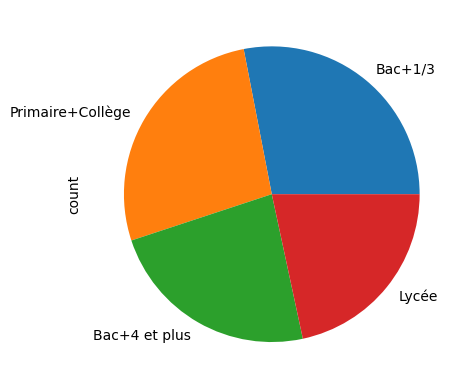

In [12]:
Descrip_conso_enfant= Descrip_conso[Descrip_conso['tage_PS'] <7]
Descrip_conso_enfant
Descrip_conso_enfant['niveau_etude'].value_counts().plot(kind='pie');

+ There are more children under 17 in Primary+College than in other levels of study.

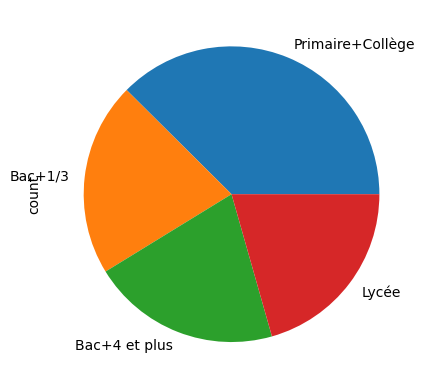

In [13]:
Descrip_conso_adult= Descrip_conso[Descrip_conso['tage_PS'] >=7]
Descrip_conso_adult
Descrip_conso_adult['niveau_etude'].value_counts().plot(kind='pie');

+ The number of adults with a 'Primary+College' level of education is higher than the number of adults with other levels of education.

In [14]:
Descrip_conso_enfant['consommation_alimentaire'].describe()

count    1854.000000
mean      575.464320
std       268.645135
min         0.000000
25%       409.156384
50%       551.106895
75%       714.892443
max      2839.083437
Name: consommation_alimentaire, dtype: float64

In [15]:
Descrip_conso_adult['consommation_alimentaire'].describe()

count    1957.000000
mean      696.532197
std       313.990299
min        32.910715
25%       483.132510
50%       652.604995
75%       859.571449
max      3263.426291
Name: consommation_alimentaire, dtype: float64

+ In the INCA3 study population 3, average daily food consumption is 575 grams/day for children and 696 grams/day for adults.

In [16]:
Descrip_conso['revenu'].describe()

count    3811.000000
mean        9.719759
std         2.831706
min         1.000000
25%         8.000000
50%        11.000000
75%        12.000000
max        13.000000
Name: revenu, dtype: float64

+ On average, the income of the household to which the individuals belong is between [1,900-2,200[ €/month

In [17]:
tableau = Descrip_conso_adult.groupby('niveau_etude')['consommation_alimentaire'].sum().reset_index()
tableau

,niveau_etude,consommation_alimentaire
0,Bac+1/3,291367.807319
1,Bac+4 et plus,283597.686626
2,Lycée,282554.481049
3,Primaire+Collège,505593.534101


In [18]:
moyenne= Descrip_conso_adult.groupby('niveau_etude')[['pates_riz_blé', 'vienoiseries_patisseries', 'yaourt_fromage_blanc', 'fromage', 'viande', 'legumes', 'pommes_de_terre', 'fruit_frais_et_sec', 'confiseries_chocolat', 'boisson_sans_alcool']].mean()
moyenne= moyenne.sort_values(by='niveau_etude')
print(moyenne)

                  pates_riz_blé  vienoiseries_patisseries  \
niveau_etude                                                
Bac+1/3               55.695490                 59.679731   
Bac+4 et plus         60.280968                 58.452168   
Lycée                 60.762354                 59.266781   
Primaire+Collège      51.890766                 48.993640   

                  yaourt_fromage_blanc    fromage     viande     legumes  \
niveau_etude                                                               
Bac+1/3                      84.230111  31.239130  39.445268  148.401326   
Bac+4 et plus                81.264891  32.876426  35.147710  155.272502   
Lycée                        80.995413  31.160654  41.850866  128.474106   
Primaire+Collège             76.678774  33.285560  48.760615  146.176136   

                  pommes_de_terre  fruit_frais_et_sec  confiseries_chocolat  \
niveau_etude                                                                  
Bac+1/3           

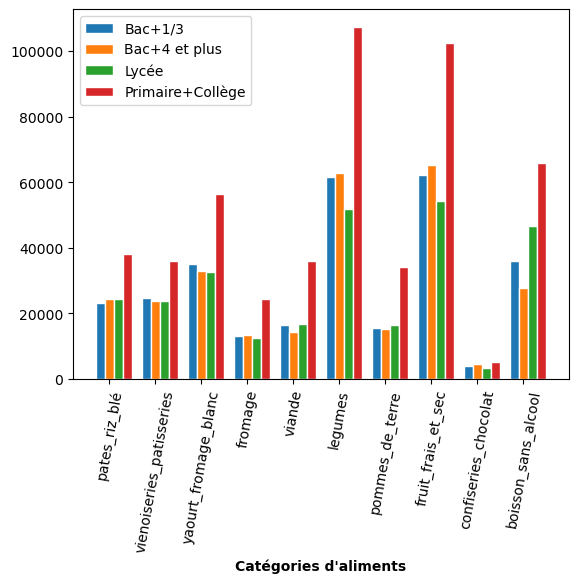

In [19]:
colonnes = ['pates_riz_blé', 'vienoiseries_patisseries', 'yaourt_fromage_blanc', 'fromage', 'viande', 'legumes', 'pommes_de_terre', 'fruit_frais_et_sec', 'confiseries_chocolat', 'boisson_sans_alcool']
tableau1 = Descrip_conso_adult.groupby('niveau_etude')[colonnes].sum()
tableau1

tableau1 = tableau1.reset_index()


import matplotlib.pyplot as plt

categories = ['pates_riz_blé', 'vienoiseries_patisseries', 'yaourt_fromage_blanc', 'fromage', 'viande', 'legumes', 'pommes_de_terre', 'fruit_frais_et_sec', 'confiseries_chocolat', 'boisson_sans_alcool']

niveaux = tableau1['niveau_etude'].unique()

barWidth = 0.2

r = np.arange(len(categories))

for i, niveau in enumerate(niveaux):
    plt.bar(r + i*barWidth, tableau1[tableau1['niveau_etude'] == niveau][categories].mean(), width = barWidth, edgecolor = 'WHITE', label=niveau)
    
plt.xlabel('Catégories d\'aliments', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(categories))], categories, rotation=80)

plt.legend()

plt.show()

+  We can see that among adults, the quantity of daily food consumption is very high among those with a Primary+College level of education, and lower among those with other levels of education. What's more, adults with higher levels of education (BAC+1/3, BAC+4 and above) consume more vegetables, fresh and dried fruit, yoghurt and white cheese, but those with secondary+primary education consume even more. So there are no inequalities among adults when it comes to eating habits.

In [20]:
tableau1 = Descrip_conso_enfant.groupby('niveau_etude')['consommation_alimentaire'].sum().reset_index()
tableau1

,niveau_etude,consommation_alimentaire
0,Bac+1/3,302342.491544
1,Bac+4 et plus,242567.448555
2,Lycée,231248.176895
3,Primaire+Collège,290752.732180


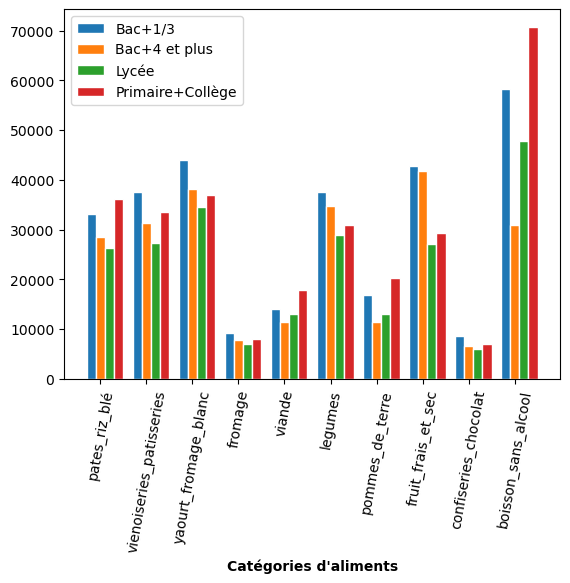

In [23]:
colonnes = ['pates_riz_blé', 'vienoiseries_patisseries', 'yaourt_fromage_blanc', 'fromage', 'viande', 'legumes', 'pommes_de_terre', 'fruit_frais_et_sec', 'confiseries_chocolat', 'boisson_sans_alcool']
tableau2 = Descrip_conso_enfant.groupby('niveau_etude')[colonnes].sum()
tableau2

tableau2 = tableau2.reset_index()


categories = ['pates_riz_blé', 'vienoiseries_patisseries', 'yaourt_fromage_blanc', 'fromage', 'viande', 'legumes', 'pommes_de_terre', 'fruit_frais_et_sec', 'confiseries_chocolat', 'boisson_sans_alcool']

niveaux = tableau2['niveau_etude'].unique()

barWidth = 0.2

r = np.arange(len(categories))

for i, niveau in enumerate(niveaux):
    plt.bar(r + i*barWidth, tableau2[tableau2['niveau_etude'] == niveau][categories].mean(), width = barWidth, edgecolor = 'white', label=niveau)

plt.xlabel('Catégories d\'aliments', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(categories))], categories, rotation=80)

plt.legend()
 
plt.show()

+ Among children, the amount of food consumed per day is very high among those in primary and secondary education and those with a bachelor's degree (Bac+1/3), and lower among the others. In addition, those with an educational level of Bac+1/3 and Bac+4 and above consume more vegetables and fresh dried fruit, while those in primary or secondary school consume even more vegetables, fresh and dried fruit, non-alcoholic drinks, yoghurt and white cheese. So there's no inequality in children's eating habits.  

In [24]:
tableau3 = Descrip_conso.groupby('revenu')['consommation_alimentaire'].sum().reset_index()
tableau3

,revenu,consommation_alimentaire
0,1.0,12546.024030
1,2.0,31351.839014
2,3.0,45864.668838
3,4.0,58722.588619
4,5.0,75361.435677
5,6.0,168067.026849
6,7.0,192275.717316
7,8.0,175361.985021
8,9.0,188468.448279
9,10.0,220218.279655


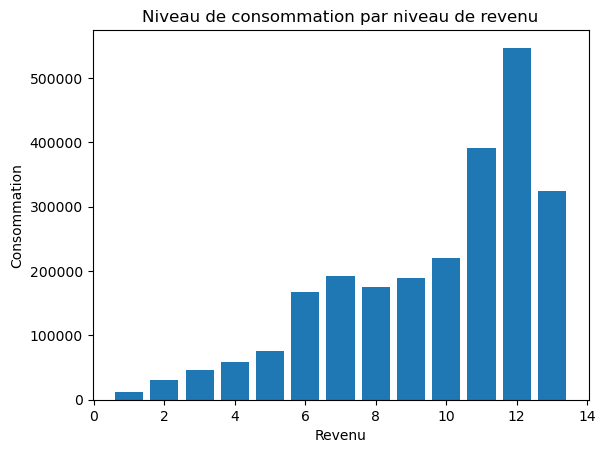

In [25]:

tableau3 = tableau3.sort_values('revenu')

plt.bar(tableau3['revenu'], tableau3['consommation_alimentaire'])
plt.xlabel('Revenu')
plt.ylabel('Consommation')
plt.title('Niveau de consommation par niveau de revenu')
plt.show()

In [33]:
Descrip_conso_faible_revenu= Descrip_conso[Descrip_conso['revenu']<9]
Descrip_conso_faible_revenu

,NOIND,pates_riz_blé,vienoiseries_patisseries,yaourt_fromage_blanc,fromage,viande,legumes,pommes_de_terre,fruit_frais_et_sec,confiseries_chocolat,...,etude_4cl_PR,revenu,situ_alim_statut,nbpers,nbadu,nbenf,IA_statut,taille,poids,imc
4,110101401,22.666666,64.666664,250.000000,4.800000,13.333333,61.333332,0.000000,25.409998,0.000000,...,1.0,6.0,1.0,2.0,2.0,0.0,0.0,152.0,51.799999,22.420361
5,110300301,0.000000,100.000000,0.000000,131.428570,26.785715,26.335405,187.857150,0.000000,0.500000,...,1.0,6.0,3.0,2.0,2.0,0.0,2.0,168.0,59.099998,20.939625
6,110300501,0.000000,0.000000,107.142860,140.285720,11.428573,209.454300,23.428574,62.087147,0.000000,...,1.0,8.0,2.0,2.0,2.0,0.0,0.0,173.0,85.599998,28.601023
10,110602701,103.928570,64.642860,44.642857,13.928571,38.653572,30.571432,25.000000,78.428574,17.857141,...,1.0,3.0,1.0,2.0,2.0,0.0,0.0,174.0,64.000000,21.138855
11,110603001,45.333332,0.000000,83.333336,39.000000,32.500000,42.000000,0.000000,40.040001,0.000000,...,1.0,5.0,1.0,1.0,1.0,0.0,0.0,158.0,54.000000,21.631149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,821700901,0.000000,32.857143,125.000010,0.000000,108.571430,31.071428,161.857150,0.000000,31.048571,...,1.0,8.0,1.0,4.0,3.0,1.0,0.0,154.0,39.599998,16.697588
4099,823501801,129.785720,0.000000,0.000000,5.714286,71.875000,0.000000,85.071434,95.657135,10.285715,...,3.0,5.0,1.0,5.0,2.0,3.0,0.0,184.0,60.299999,17.810728
4103,824904401,52.285721,119.285710,125.000010,12.857142,74.071434,285.303560,0.000000,125.871430,0.000000,...,2.0,6.0,2.0,3.0,2.0,1.0,0.0,165.0,55.299999,20.312212
4106,826804401,66.071426,135.232420,0.000000,0.409357,33.214283,161.471440,0.000000,88.507141,6.085715,...,1.0,8.0,1.0,2.0,1.0,1.0,0.0,146.0,39.000000,18.296116


In [35]:
Descrip_conso_grand_revenu= Descrip_conso[Descrip_conso['revenu']>=9]
Descrip_conso_grand_revenu


,NOIND,pates_riz_blé,vienoiseries_patisseries,yaourt_fromage_blanc,fromage,viande,legumes,pommes_de_terre,fruit_frais_et_sec,confiseries_chocolat,...,etude_4cl_PR,revenu,situ_alim_statut,nbpers,nbadu,nbenf,IA_statut,taille,poids,imc
0,110100101,161.000000,41.333332,208.333330,0.000000,84.333336,42.166668,71.333336,84.580002,34.133335,...,1.0,12.0,1.0,4.0,3.0,1.0,0.0,168.0,51.599998,18.282312
1,110100701,40.000000,49.714291,205.357150,7.142857,0.000000,234.600010,0.000000,279.177120,11.428572,...,1.0,11.0,1.0,2.0,2.0,0.0,0.0,166.0,65.099998,23.624619
2,110100801,78.571426,118.571420,0.000000,13.928571,33.482143,63.285717,38.214283,374.171420,0.000000,...,1.0,11.0,1.0,4.0,2.0,2.0,0.0,162.0,78.599998,29.949701
3,110101201,58.714287,130.714280,0.000000,0.000000,68.571434,258.714290,25.000000,78.428574,0.000000,...,3.0,11.0,1.0,1.0,1.0,0.0,0.0,177.0,81.900002,26.141914
7,110600101,0.000000,0.000000,89.285713,13.928571,68.675003,102.957150,36.607143,213.062150,0.000000,...,1.0,9.0,1.0,1.0,1.0,0.0,0.0,168.0,62.400002,22.108845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108,827301801,50.892857,4.642857,150.714280,0.000000,0.000000,99.999992,0.000000,83.246605,0.000000,...,1.0,12.0,1.0,4.0,2.0,2.0,0.0,79.0,11.000000,17.625381
4109,827404801,226.857150,30.982143,44.642857,21.785713,0.000000,125.000000,0.000000,338.874300,9.714287,...,4.0,13.0,1.0,4.0,2.0,2.0,0.0,147.0,37.000000,17.122496
4110,827510001,33.928570,45.714287,80.357140,7.142857,0.000000,0.000000,0.000000,38.080002,27.584377,...,4.0,10.0,1.0,3.0,2.0,1.0,0.0,162.0,47.500000,18.099375
4111,828402601,0.000000,199.642850,44.642857,43.928570,0.000000,67.500000,82.857140,0.000000,26.071428,...,2.0,12.0,2.0,3.0,2.0,1.0,0.0,159.0,52.299999,20.687473


In [36]:
Descrip_conso_faible_revenu=Descrip_conso_faible_revenu.drop(columns=['NOMEN','sex_PS','tage_PS','diplome_plusélevé','niveau_etude','situation_profess_interv','sex_PR','diplome_PR','etude_4cl_PR','revenu','situ_alim_statut','nbpers','nbadu','nbenf','IA_statut','taille','poids','imc'])
somme = Descrip_conso_faible_revenu.sum()

nouveau_df = pd.DataFrame(somme).transpose()
nouveau_df.columns = Descrip_conso_faible_revenu.columns

nouveau_df


,NOIND,pates_riz_blé,vienoiseries_patisseries,yaourt_fromage_blanc,fromage,viande,legumes,pommes_de_terre,fruit_frais_et_sec,confiseries_chocolat,boisson_sans_alcool,consommation_alimentaire
0,3.752438e+11,71793.05294,68208.447805,94557.41014,30029.078817,46502.536241,130550.09935,49314.318258,130710.729351,11523.804318,126361.808144,759551.285363


In [37]:
Descrip_conso_grand_revenu=Descrip_conso_grand_revenu.drop(columns=['NOMEN','sex_PS','tage_PS','diplome_plusélevé','niveau_etude','situation_profess_interv','sex_PR','diplome_PR','etude_4cl_PR','revenu','situ_alim_statut','nbpers','nbadu','nbenf','IA_statut','taille','poids','imc'])
somme1 = Descrip_conso_grand_revenu.sum()

nouveau_df1 = pd.DataFrame(somme1).transpose()
nouveau_df1.columns = Descrip_conso_grand_revenu.columns

nouveau_df1


,NOIND,pates_riz_blé,vienoiseries_patisseries,yaourt_fromage_blanc,fromage,viande,legumes,pommes_de_terre,fruit_frais_et_sec,confiseries_chocolat,boisson_sans_alcool,consommation_alimentaire
0,8.705217e+11,162375.471671,169772.794006,215993.153136,65295.998234,93093.639205,285090.911284,93285.091972,294174.324256,33373.201917,258018.487226,1.670473e+06


+ In relation to income, we can see that the quantity of daily consumption increases as income rises. In addition, high-income earners have the same eating habits (pasta_rice_wheat, pastries, cheese, meat, vegetables, potatoes) as low-income earners.

# <span style="color:blue">**CONCLUSION**</span>
In short, our analyses show that:
+ level of education doesn't really influence French eating habits. In fact, whether among children or adults, those with a low level of education (especially primary and secondary) consume more dried fruit, vegetables, yoghurt and fromage frais than those with a high level of education (Bac+1/3, Bac+4 and over), thus invalidating the first hypothesis.

+ Income does indeed determine the level of food consumption, since when income is high, the quantity of food consumed increases. This confirms the second hypothesis. It should be noted that eating habits remain unchanged, only quantity increases with income.

This work has some exceptions. We based ourselves on just two socio-economic factors: level of education and income, due to the constraints of the data available to us. Other factors could have been taken into account: medical history, profession and culture.
